# Import Necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import collections
import os
import json
import pickle
import keras
import warnings
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

warnings.filterwarnings('ignore')
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Device mapping:



# Load the Train Test Split

In [35]:
X_train = np.load(os.path.join("..", "IPD", "x_train.npy"))
X_test = np.load(os.path.join("..", "IPD", "x_test.npy"))
Y_train = np.load(os.path.join("..", "IPD", "y_train.npy"))
Y_test = np.load(os.path.join("..", "IPD", "y_test.npy"))
print("Training samples : {} \nTesting Samples : {}".format(X_train.shape, X_test.shape))
print("Training Labels : {} \nTesting Labels : {}".format(Y_train.shape, Y_test.shape))

Training samples : (332, 250, 12) 
Testing Samples : (83, 250, 12)
Training Labels : (332,) 
Testing Labels : (83,)


In [36]:
_, num_timeframes, num_features = X_train.shape

# Reshape data for model

In [37]:
X_train = X_train.reshape((-1,num_timeframes,num_features,1))
X_test = X_test.reshape((-1,num_timeframes,num_features,1))
Y_train = keras.utils.to_categorical(Y_train, 6)
Y_test = keras.utils.to_categorical(Y_test, 6)
print("Training samples : {} \nTesting Samples : {}".format(X_train.shape, X_test.shape))
print("Training Labels : {} \nTesting Labels : {}".format(Y_train.shape, Y_test.shape))

Training samples : (332, 250, 12, 1) 
Testing Samples : (83, 250, 12, 1)
Training Labels : (332, 6) 
Testing Labels : (83, 6)


# CNN Model

In [46]:
input_shape = X_train[0].shape
batch_size = 5
epochs = 150

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5),
                 activation='tanh',
                 input_shape=input_shape))
model.add(Conv2D(12, (3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 246, 8, 6)         156       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 244, 6, 12)        660       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 122, 3, 12)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 122, 3, 12)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4392)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 12)                52716     
_________________________________________________________________
dropout_16 (Dropout)         (None, 12)               

In [50]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(X_test, Y_test))

Train on 332 samples, validate on 83 samples
Epoch 1/150
332/332 [==============================] - 3s 10ms/step - loss: 0.2246 - acc: 0.9157 - val_loss: 0.4065 - val_acc: 0.8916
Epoch 2/150
332/332 [==============================] - 1s 4ms/step - loss: 0.1834 - acc: 0.9277 - val_loss: 0.3401 - val_acc: 0.8554
Epoch 3/150
332/332 [==============================] - 2s 5ms/step - loss: 0.2611 - acc: 0.9066 - val_loss: 0.3255 - val_acc: 0.8675
Epoch 4/150
332/332 [==============================] - 2s 6ms/step - loss: 0.2397 - acc: 0.9127 - val_loss: 0.3253 - val_acc: 0.8675
Epoch 5/150
332/332 [==============================] - 2s 6ms/step - loss: 0.2353 - acc: 0.9096 - val_loss: 0.3256 - val_acc: 0.8313
Epoch 6/150
332/332 [==============================] - 2s 6ms/step - loss: 0.2505 - acc: 0.9096 - val_loss: 0.3320 - val_acc: 0.8675
Epoch 7/150
332/332 [==============================] - 2s 6ms/step - loss: 0.2258 - acc: 0.9127 - val_loss: 0.3430 - val_acc: 0.8795
Epoch 8/150
332/332 [==

Epoch 62/150
332/332 [==============================] - 2s 5ms/step - loss: 0.2156 - acc: 0.9307 - val_loss: 0.3699 - val_acc: 0.8795
Epoch 63/150
332/332 [==============================] - 2s 5ms/step - loss: 0.2296 - acc: 0.9157 - val_loss: 0.3271 - val_acc: 0.8795
Epoch 64/150
332/332 [==============================] - 2s 6ms/step - loss: 0.1520 - acc: 0.9518 - val_loss: 0.4509 - val_acc: 0.8916
Epoch 65/150
332/332 [==============================] - 2s 6ms/step - loss: 0.2277 - acc: 0.9096 - val_loss: 0.3674 - val_acc: 0.8795
Epoch 66/150
332/332 [==============================] - 2s 6ms/step - loss: 0.1881 - acc: 0.9398 - val_loss: 0.3743 - val_acc: 0.8916
Epoch 67/150
332/332 [==============================] - 2s 6ms/step - loss: 0.1486 - acc: 0.9578 - val_loss: 0.2881 - val_acc: 0.8916
Epoch 68/150
332/332 [==============================] - 2s 5ms/step - loss: 0.2039 - acc: 0.9458 - val_loss: 0.3124 - val_acc: 0.8795
Epoch 69/150
332/332 [==============================] - 2s 5ms

Epoch 123/150
332/332 [==============================] - 1s 4ms/step - loss: 0.2097 - acc: 0.9398 - val_loss: 0.3036 - val_acc: 0.8916
Epoch 124/150
332/332 [==============================] - 2s 5ms/step - loss: 0.1569 - acc: 0.9428 - val_loss: 0.3704 - val_acc: 0.8916
Epoch 125/150
332/332 [==============================] - 2s 5ms/step - loss: 0.1929 - acc: 0.9307 - val_loss: 0.2744 - val_acc: 0.9157
Epoch 126/150
332/332 [==============================] - 2s 6ms/step - loss: 0.1810 - acc: 0.9367 - val_loss: 0.3186 - val_acc: 0.8795
Epoch 127/150
332/332 [==============================] - 1s 4ms/step - loss: 0.2420 - acc: 0.9187 - val_loss: 0.3539 - val_acc: 0.8675
Epoch 128/150
332/332 [==============================] - 2s 5ms/step - loss: 0.2327 - acc: 0.9217 - val_loss: 0.3065 - val_acc: 0.9036
Epoch 129/150
332/332 [==============================] - 2s 6ms/step - loss: 0.2411 - acc: 0.9066 - val_loss: 0.3927 - val_acc: 0.8916
Epoch 130/150
332/332 [==============================] 

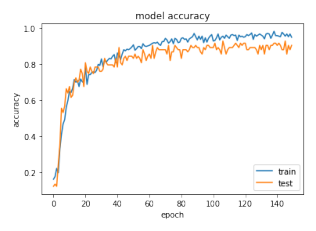

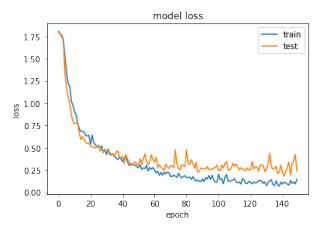

In [64]:
print(history.history.keys())

# Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [52]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

83/83 [==============================] - 0s 679us/step
Test loss: 0.39956603280032976
Test accuracy: 0.9156626470117684


# Train on entire data

In [65]:
X_train = np.load(os.path.join("..", "IPD", "x_train.npy"))
X_test = np.load(os.path.join("..", "IPD", "x_test.npy"))
Y_train = np.load(os.path.join("..", "IPD", "y_train.npy"))
Y_test = np.load(os.path.join("..", "IPD", "y_test.npy"))

X_train = np.concatenate((X_train,X_test), axis=0)
Y_train = np.concatenate((Y_train,Y_test), axis=0)

_ , num_timeframes, num_features = X_train.shape
X_train = X_train.reshape((-1,num_timeframes*num_features))
from scipy.sparse import coo_matrix
X_sparse = coo_matrix(X_train)

from sklearn.utils import shuffle
X_train, X_sparse, Y_train = shuffle(X_train, X_sparse, Y_train)
X_train = X_train.reshape((-1,num_timeframes,num_features))

In [66]:
X_train = X_train.reshape((-1,num_timeframes,num_features,1))
X_test = X_test.reshape((-1,num_timeframes,num_features,1))

Y_train = keras.utils.to_categorical(Y_train, 6)
Y_test = keras.utils.to_categorical(Y_test, 6)
print("Training samples : {} \nTesting Samples : {}".format(X_train.shape, X_test.shape))
print("Training Labels : {} \nTesting Labels : {}".format(Y_train.shape, Y_test.shape))

Training samples : (415, 250, 12, 1) 
Testing Samples : (83, 250, 12, 1)
Training Labels : (415, 6) 
Testing Labels : (83, 6)


In [67]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, 
                    batch_size=batch_size, 
                    epochs=epochs+100, 
                    verbose=0, 
                    validation_data=(X_test, Y_test))

# Saving model

In [70]:
weights = model.get_weights()
pickle.dump(weights, open(os.path.join("..", "IPD", "CNN_model.pkl"),"wb"))
print("Model Saved")

Model Saved
